# Comparative Analysis

In [70]:
import pandas as pd

import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

## Load Data

In [54]:
# base learners
dtc_df = pd.read_csv("./results/dtc.csv")
svc_df = pd.read_csv("./results/svc.csv")
lra_df = pd.read_csv("./results/lra.csv")
ann_df = pd.read_csv("./results/ann.csv")

# boosting
boost_dtc_df = pd.read_csv("./results/boost_dtc.csv")
boost_svc_df = pd.read_csv("./results/boost_svc.csv")
boost_lra_df = pd.read_csv("./results/boost_lra.csv")
boost_ann_df = pd.read_csv("./results/boost_ann.csv")

# bagging
bag_dtc_df = pd.read_csv("./results/bag_dtc.csv")
bag_svc_df = pd.read_csv("./results/bag_svc.csv")
bag_lra_df = pd.read_csv("./results/bag_lra.csv")
bag_ann_df = pd.read_csv("./results/bag_ann.csv")

# stacking
stk_df = pd.read_csv('./results/stk.csv')
stk_cv_df = pd.read_csv('./results/stk_cv.csv')

In [55]:
def create_df(dfs_dict, metric):
    """Create dataframe with only `metric` columns."""
    col_dict = {}
    for label, df in dfs_dict.items():
        col_dict[label] = df[metric]
    return pd.DataFrame(col_dict)

In [56]:
def pd_boxplot(df, metric, title, save=False):
    """Plot boxplot of the dataframe."""
    df.boxplot(figsize=(6 + int(len(df.columns)/2), 8), rot=45)
    plt.title(title, fontsize=16)
    plt.xlabel('base learner', fontsize=12)
    plt.ylabel(metric, fontsize=12)
    if save: 
        plt.savefig(f'figures/{title}.png')
    plt.show()

In [57]:
def plot_BCA_mAUC(dfs_dict, title, save=False):
    """Plot routine for BCA and mAUC."""
    BCA_df = create_df(dfs_dict, 'BCA_test')
    mAUC_df = create_df(dfs_dict, 'mAUC_test')
    pd_boxplot(BCA_df, 'BCA', f'{title} (BCA)', save=save)
    pd_boxplot(mAUC_df, 'mAUC', f'{title} (mAUC)', save=save)

In [112]:
def t_test(df1, df2, title):
    t = stats.ttest_ind(df1, df2, equal_var = False)
    print(title, ":\n")
    print("========T-test Report========")
    for i, col in enumerate(df1.columns, start=0): 
        print(col + "\t-", "Independent: ", t[1][i]<0.05, "with p =", t[1][i])
    print("")

## Base Learners

In [58]:
base_dict = {
    'DTC': dtc_df,
    'SVC': svc_df,
    'LRA': lra_df,
    'ANN': ann_df,
}

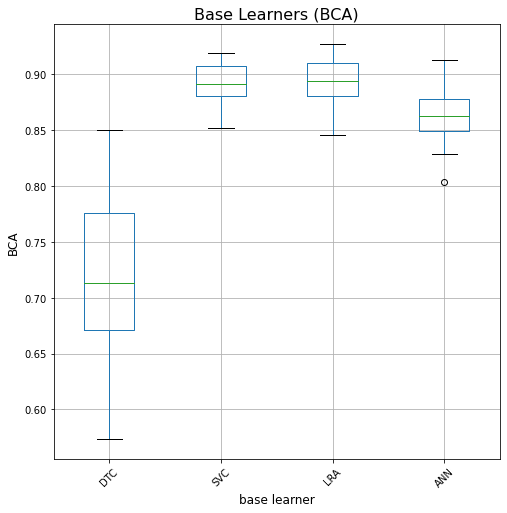

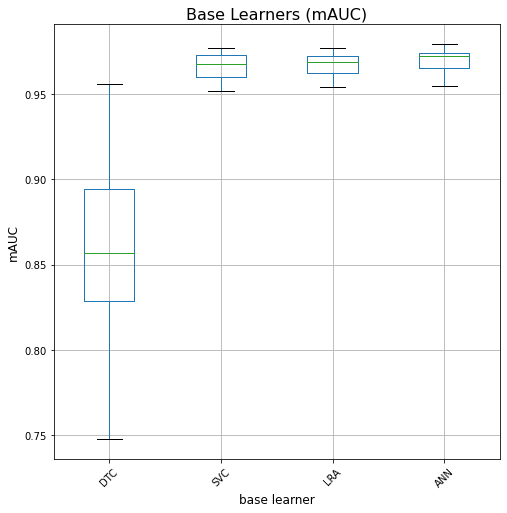

In [59]:
plot_BCA_mAUC(base_dict, 'Base Learners')

## Bagging

In [60]:
bag_dict = {
    'DTC': bag_dtc_df,
    'SVC': bag_svc_df,
    'LRA': bag_lra_df,
    'ANN': bag_ann_df,
}

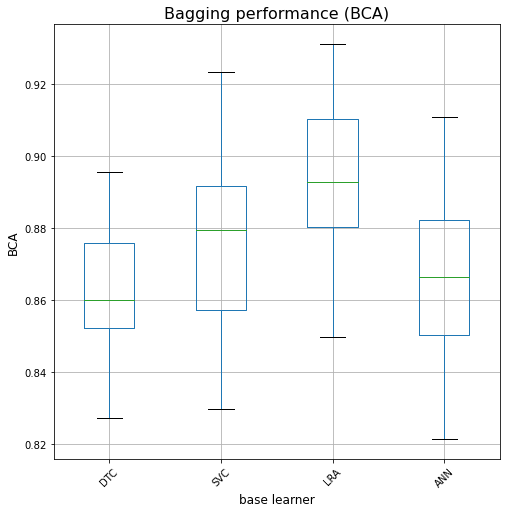

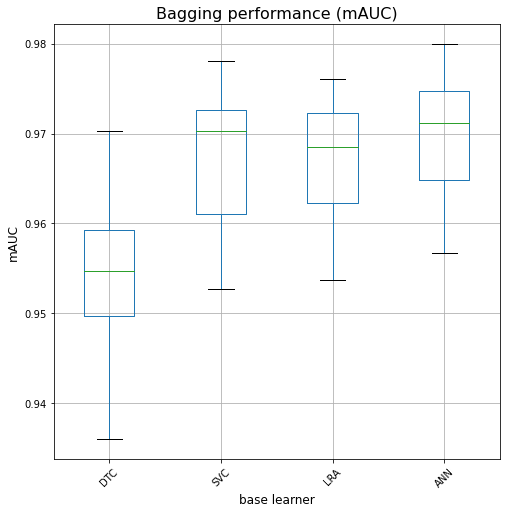

In [61]:
plot_BCA_mAUC(bag_dict, 'Bagging performance')

## Base Learners vs Bagging

In [62]:
base_bag_dict = {
    'DTC': dtc_df,
    'Bagging(DTC)': bag_dtc_df,
    'SVC': svc_df,
    'Bagging(SVC)': bag_svc_df,
    'LRA': lra_df,
    'Bagging(LRA)': bag_lra_df,
    'ANN': ann_df,
    'Bagging(ANN)': bag_ann_df
}

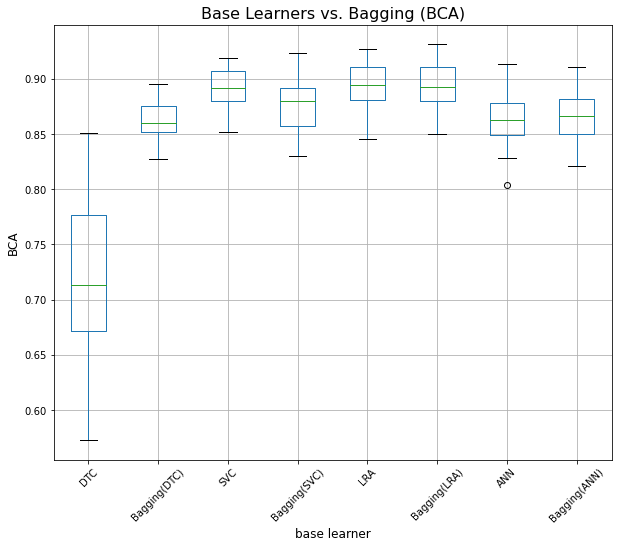

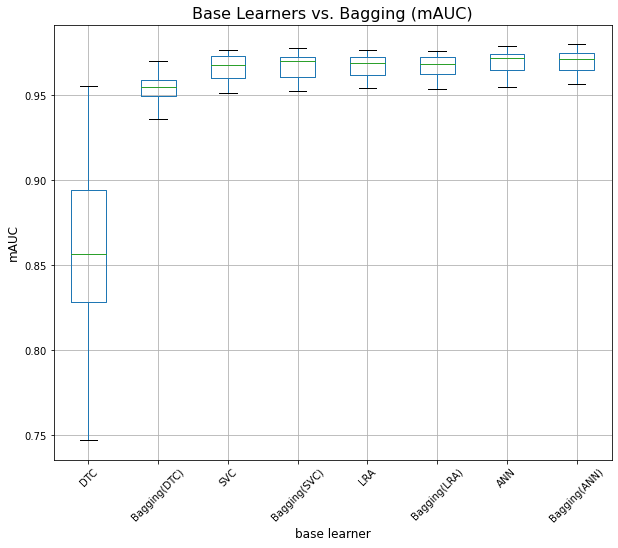

In [63]:
plot_BCA_mAUC(base_bag_dict, 'Base Learners vs. Bagging')

## Base Learners vs Stacking

In [64]:
base_stk_dict = {
    'DTC': dtc_df,
    'SVC': svc_df,
    'LRA': lra_df,
    'ANN': ann_df,
    'Stacking': stk_df,
    'Stacking (CV)': stk_cv_df
}

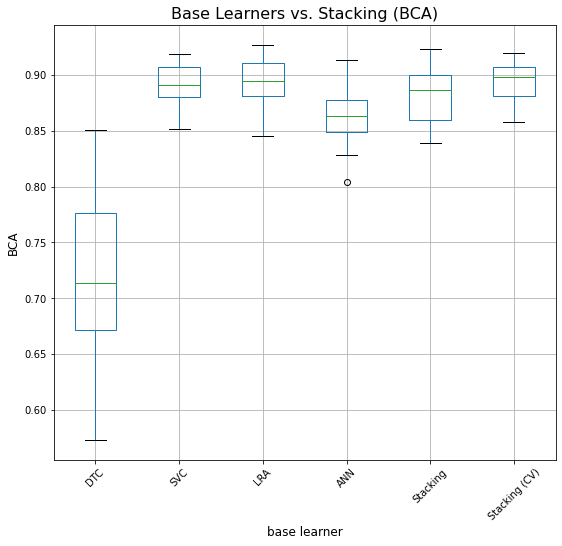

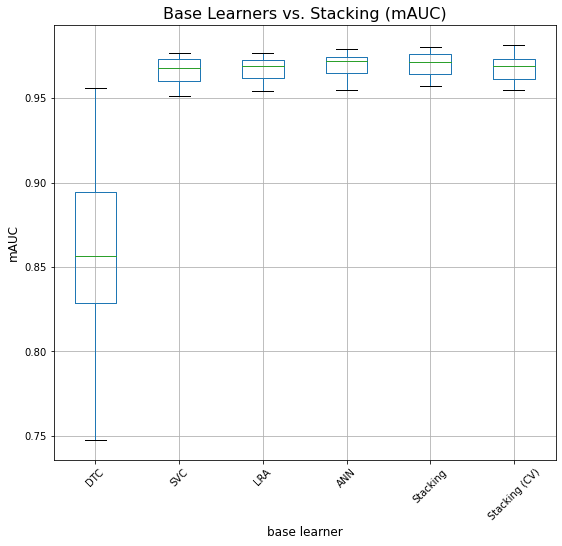

In [65]:
plot_BCA_mAUC(base_stk_dict, 'Base Learners vs. Stacking')

## Base Learners vs Boosting

In [66]:
base_boost_dict = {
    'DTC': dtc_df,
    'Boosting(DTC)': boost_dtc_df,
    'SVC': svc_df,
    'Boosting(SVC)': boost_svc_df,
    'LRA': lra_df,
    'Boosting(LRA)': boost_lra_df,
    'ANN': ann_df,
    'Boosting(ANN)': boost_ann_df
}

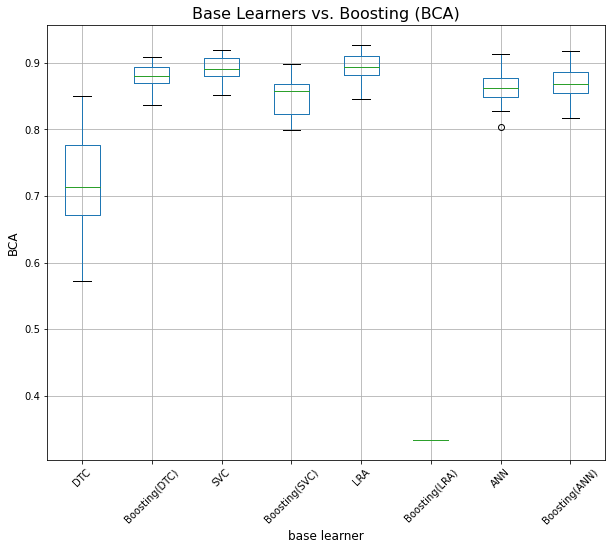

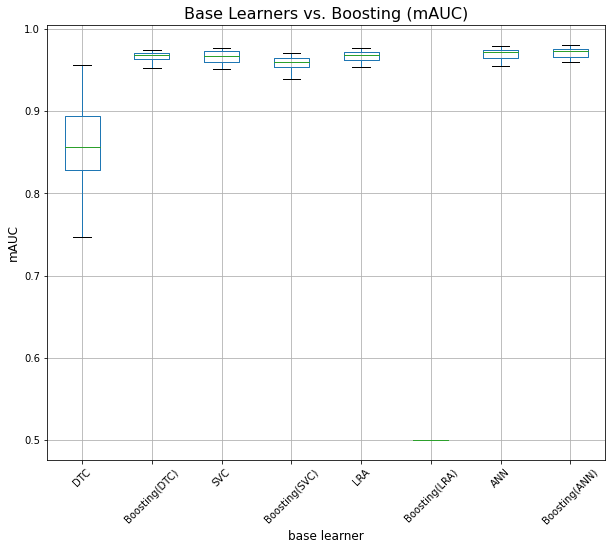

In [67]:
plot_BCA_mAUC(base_boost_dict, 'Base Learners vs. Boosting')

## Bagging vs Stacking vs Boosting

In [68]:
stk_bag_boost_dict = {
    'Bagging(DTC)': bag_dtc_df,
    'Bagging(SVC)': bag_svc_df,
    'Bagging(LRA)': bag_lra_df,
    'Bagging(ANN)': bag_ann_df,
    'Stacking': stk_df,
    'Stacking (CV)': stk_cv_df,
    'Boosting(DTC)': boost_dtc_df,
    'Boosting(SVC)': boost_svc_df,
    'Boosting(LRA)': boost_lra_df,
    'Boosting(ANN)': boost_ann_df
}

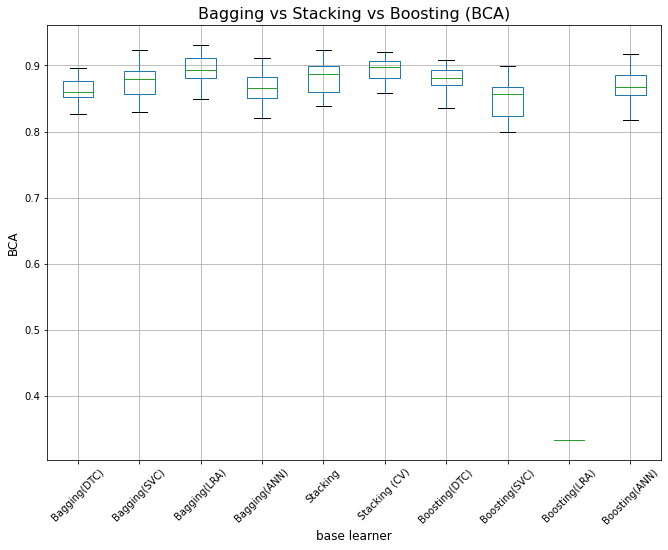

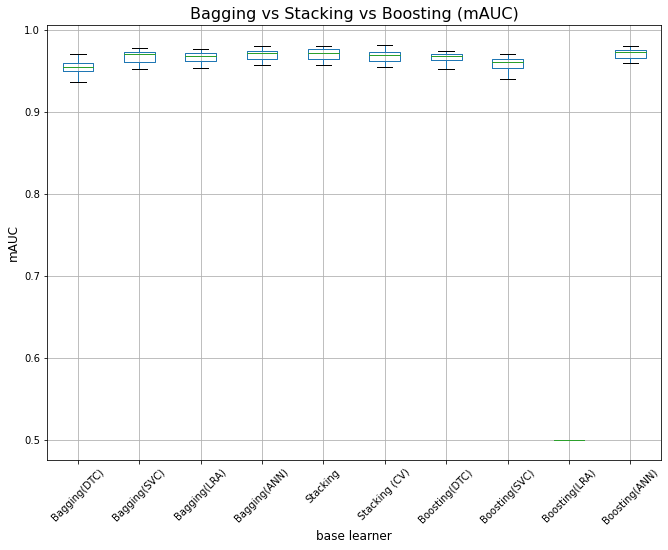

In [69]:
plot_BCA_mAUC(stk_bag_boost_dict, 'Bagging vs Stacking vs Boosting')

## Independent t-tests - Stacking

In [113]:
# Stacking vs Base Learner Decision Tree
t = t_test(stk_cv_df, dtc_df, "Stacking vs Decision Tree")

# Stacking vs Base Learner LRA
t = t_test(stk_cv_df, lra_df, "Stacking vs LRA")

# Stacking vs Base Learner MLP
t = t_test(stk_cv_df, ann_df, "Stacking vs MLP")

# Stacking vs Base Learner SVC
t = t_test(stk_cv_df, svc_df, "Stacking vs SVC")

Stacking vs Decision Tree :

========T-test Report========
BCA_train	- Independent:  True with p = 7.703778418739106e-14
BCA_test	- Independent:  True with p = 1.8533168145525627e-13
mAUC_train	- Independent:  True with p = 3.210182258919018e-14
mAUC_test	- Independent:  True with p = 2.383070052054512e-13

Stacking vs LRA :

========T-test Report========
BCA_train	- Independent:  True with p = 1.0447968982471183e-16
BCA_test	- Independent:  False with p = 0.6943463333266222
mAUC_train	- Independent:  True with p = 5.726292514548833e-17
mAUC_test	- Independent:  False with p = 0.9527365170048339

Stacking vs MLP :

========T-test Report========
BCA_train	- Independent:  True with p = 3.611037688239315e-15
BCA_test	- Independent:  True with p = 1.8052089602340762e-07
mAUC_train	- Independent:  True with p = 8.266183142363871e-08
mAUC_test	- Independent:  False with p = 0.37441826543720436

Stacking vs SVC :

========T-test Report========
BCA_train	- Independent:  True with p = 4.7982381

## Independent t-tests - Bagging

In [114]:
# Bagging vs Base Learner Decision Tree
t = t_test(bag_dtc_df, dtc_df, "Bagging vs Decision Tree")

# Bagging vs Base Learner LRA
t = t_test(bag_lra_df, lra_df, "Bagging vs LRA")

# Bagging vs Base Learner MLP
t = t_test(bag_ann_df, ann_df, "Bagging vs MLP")

# Bagging vs Base Learner SVC
t = t_test(bag_svc_df, svc_df, "Bagging vs SVC")

Bagging vs Decision Tree :

========T-test Report========
BCA_train	- Independent:  True with p = 4.521893431649937e-10
BCA_test	- Independent:  True with p = 4.2219413490359344e-11
mAUC_train	- Independent:  True with p = 4.686917222284034e-11
mAUC_test	- Independent:  True with p = 7.459226068295744e-12

Bagging vs LRA :

========T-test Report========
BCA_train	- Independent:  False with p = 0.9417988652599188
BCA_test	- Independent:  False with p = 0.9772675481325758
mAUC_train	- Independent:  False with p = 0.4099379369554146
mAUC_test	- Independent:  False with p = 0.8972365659342084

Bagging vs MLP :

========T-test Report========
BCA_train	- Independent:  True with p = 0.0024317116943254986
BCA_test	- Independent:  False with p = 0.7097931666136283
mAUC_train	- Independent:  True with p = 2.866795886089699e-06
mAUC_test	- Independent:  False with p = 0.8996305226781255

Bagging vs SVC :

========T-test Report========
BCA_train	- Independent:  True with p = 1.0285244825328637e-13

## Independent t-tests - Boosting

In [115]:
# Boosting vs Base Learner Decision Tree
t = t_test(boost_dtc_df, dtc_df, "Boosting vs Decision Tree")

# Boosting vs Base Learner LRA
t = t_test(boost_lra_df, lra_df, "Boosting vs LRA")

# Boosting vs Base Learner MLP
t = t_test(boost_ann_df, ann_df, "Boosting vs MLP")

# Boosting vs Base Learner SVC
t = t_test(boost_svc_df, svc_df, "Boosting vs SVC")

Boosting vs Decision Tree :

========T-test Report========
BCA_train	- Independent:  True with p = 8.143666522750172e-12
BCA_test	- Independent:  True with p = 1.7584312352108446e-12
mAUC_train	- Independent:  True with p = 8.328173434217188e-13
mAUC_test	- Independent:  True with p = 3.9458664281035e-13

Boosting vs LRA :

========T-test Report========
BCA_train	- Independent:  True with p = 4.206536725379359e-62
BCA_test	- Independent:  True with p = 7.301880592178856e-43
mAUC_train	- Independent:  True with p = 1.29503450960415e-73
mAUC_test	- Independent:  True with p = 2.2149927088449107e-55

Boosting vs MLP :

========T-test Report========
BCA_train	- Independent:  True with p = 7.032729305548538e-05
BCA_test	- Independent:  False with p = 0.335385759788129
mAUC_train	- Independent:  True with p = 2.1631307607241474e-10
mAUC_test	- Independent:  False with p = 0.5153974429312915

Boosting vs SVC :

========T-test Report========
BCA_train	- Independent:  True with p = 7.5476592021